In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
nifty_stocks=["TCS.NS","ICICIBANK.NS","HINDUNILVR.NS","INFY.NS","ITC.NS","BHARTIARTL.NS","SBIN.NS","LT.NS","KOTAKBANK.NS",
            "HCLTECH.NS","MARUTI.NS","AXISBANK.NS","TITAN.NS","SUNPHARMA.NS","ADANIENT.NS","ASIANPAINT.NS","NESTLEIND.NS",
            "RELIANCE.NS","BAJFINANCE.NS","HDFCBANK.NS"]

#selecion of stocks
selected_stocks=[]

#iterating through stocks and creating pairs of two
for i in range(0,len(nifty_stocks),2):
    stock_1=nifty_stocks[i]
    stock_2=nifty_stocks[i+1]
    
    #downloading data
    data=yf.download([stock_1,stock_2],start="2022-01-01",end="2023-01-01")

    #calculating returns and matrix
    returns=data['Adj Close'].pct_change()
    corr_matrix=returns.corr()
    corr_matrix_avg= corr_matrix.mean()
    
    #selecting the one with lower correlation avg(helps in eliminating stocks in similar sector too, for eg: either of pepsi
    #and coke will be selected based on lower corr=>diversification)
    if corr_matrix_avg[stock_1]<corr_matrix_avg[stock_2]:
        selected_stocks.append(stock_1)
    else:
        selected_stocks.append(stock_2)

#data for selected stocks
data=yf.download(selected_stocks,start="2022-01-01",end="2023-01-01")

#returns and matrix
returns=data['Adj Close'].pct_change()
corr_matrix=returns.corr()

#least correlated stocks
top_5_uncorrelated=corr_matrix.mean().sort_values().index[:5]

#creating a matrix for top 5 uncorrelated
selected_corr_matrix = returns[top_5_uncorrelated].corr()

#printing the stocks
print("Top 5 Least Correlated Stocks:")
print('\n'.join(top_5_uncorrelated))

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  10 of 10 completed
Top 5 Least Correlated Stocks:
SUNPHARMA.NS
ASIANPAINT.NS
BHARTIARTL.NS
RELIANCE.NS
AXISBANK.NS


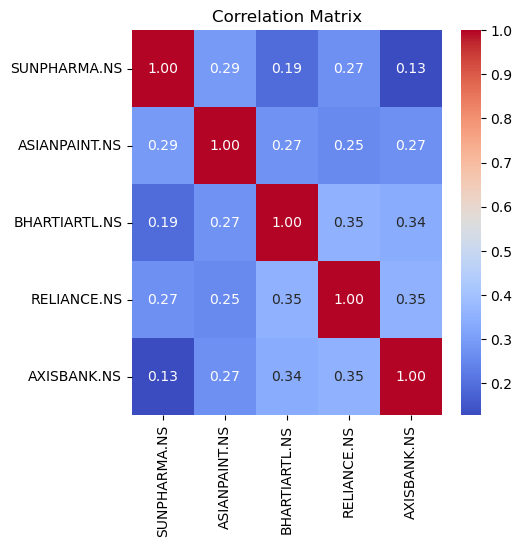

In [3]:
#plotting the matrix
plt.figure(figsize=(5,5))
sns.heatmap(selected_corr_matrix,annot=True,cmap='coolwarm',fmt="0.2f")
plt.title("Correlation Matrix")
plt.show()